# Example of loading level 2 data from Earthscope Borehole Strainmeter Analysis Center

This notebook demonstrates using the load_l2_ascii() method of earthscopestraintools to read in published data products (where available) into Timeseries objects.  

In [1]:
# Import relevant modules from the earscopestraintools package
from earthscopestraintools.ascii_tools import load_l2_ascii
from earthscopestraintools.gtsm_metadata import GtsmMetadata
from earthscopestraintools.timeseries import plot_timeseries_comparison

# Allow logged output to be printed in the notebook as code cells are run
import logging
logger = logging.getLogger()
logging.basicConfig(
        format="%(message)s", level=logging.INFO
    )

### Select the station and time range, and then get the data

In [2]:
# define the network and station using FDSN seed codes ()
# then load the metadata for that station
network = 'PB' # e.g. PB = Plate Boundary Observatory
station = 'B073' # available stations listed here https://www.unavco.org/data/strain-seismic/bsm-data/lib/docs/bsm_metadata.txt
start = '2021-11-25'
end = '2023-11-30'
meta = GtsmMetadata(network,station)


In [3]:
#this function downloads yearly tarballs, unpacks them, and restructures them into a dictionary containing 
#six timeseries objects (microstrain, the four corrections, and the atmospheric pressure data)
l2 = load_l2_ascii(station, start, end, strain_type='gauge')

Loading 2021 gauge microstrain into Timeseries
Loading 2021 gauge offset_c into Timeseries
Loading 2021 gauge tide_c into Timeseries
Loading 2021 gauge trend_c into Timeseries
Loading 2021 gauge atmp_c into Timeseries
Loading 2021 gauge atmp into Timeseries
Loading 2022 gauge microstrain into Timeseries
Loading 2022 gauge offset_c into Timeseries
Loading 2022 gauge tide_c into Timeseries
Loading 2022 gauge trend_c into Timeseries
Loading 2022 gauge atmp_c into Timeseries
Loading 2022 gauge atmp into Timeseries
Loading 2023 gauge microstrain into Timeseries
Loading 2023 gauge offset_c into Timeseries
Loading 2023 gauge tide_c into Timeseries
Loading 2023 gauge trend_c into Timeseries
Loading 2023 gauge atmp_c into Timeseries
Loading 2023 gauge atmp into Timeseries
Truncating B073.gauge.microstrain
Truncating B073.gauge.offset_c
Truncating B073.gauge.tide_c
Truncating B073.gauge.trend_c
Truncating B073.gauge.atmp_c
Truncating B073.gauge.atmp


In [4]:
#inspect contents of dictionary
l2

{'microstrain': <earthscopestraintools.timeseries.Timeseries at 0x7f8860b69250>,
 'offset_c': <earthscopestraintools.timeseries.Timeseries at 0x7f8860b69070>,
 'tide_c': <earthscopestraintools.timeseries.Timeseries at 0x7f884b762910>,
 'trend_c': <earthscopestraintools.timeseries.Timeseries at 0x7f884b7620d0>,
 'atmp_c': <earthscopestraintools.timeseries.Timeseries at 0x7f8860b81a30>,
 'atmp': <earthscopestraintools.timeseries.Timeseries at 0x7f8860b818b0>}

In [5]:
l2['microstrain'].stats()

B073.gauge.microstrain
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2021-11-25 00:00:00 - 2023-08-22 23:50:00        | Period:         300.0s
    | Series: microstrain| Units:   microstrain| Level:         2a| Gaps:           10.27% 
    | Epochs:      182302| Good:       163981.0| Missing:  17948.0| Interpolated:      0.0
    | Samples:     729208| Good:         655924| Missing:    71792| Interpolated:        0


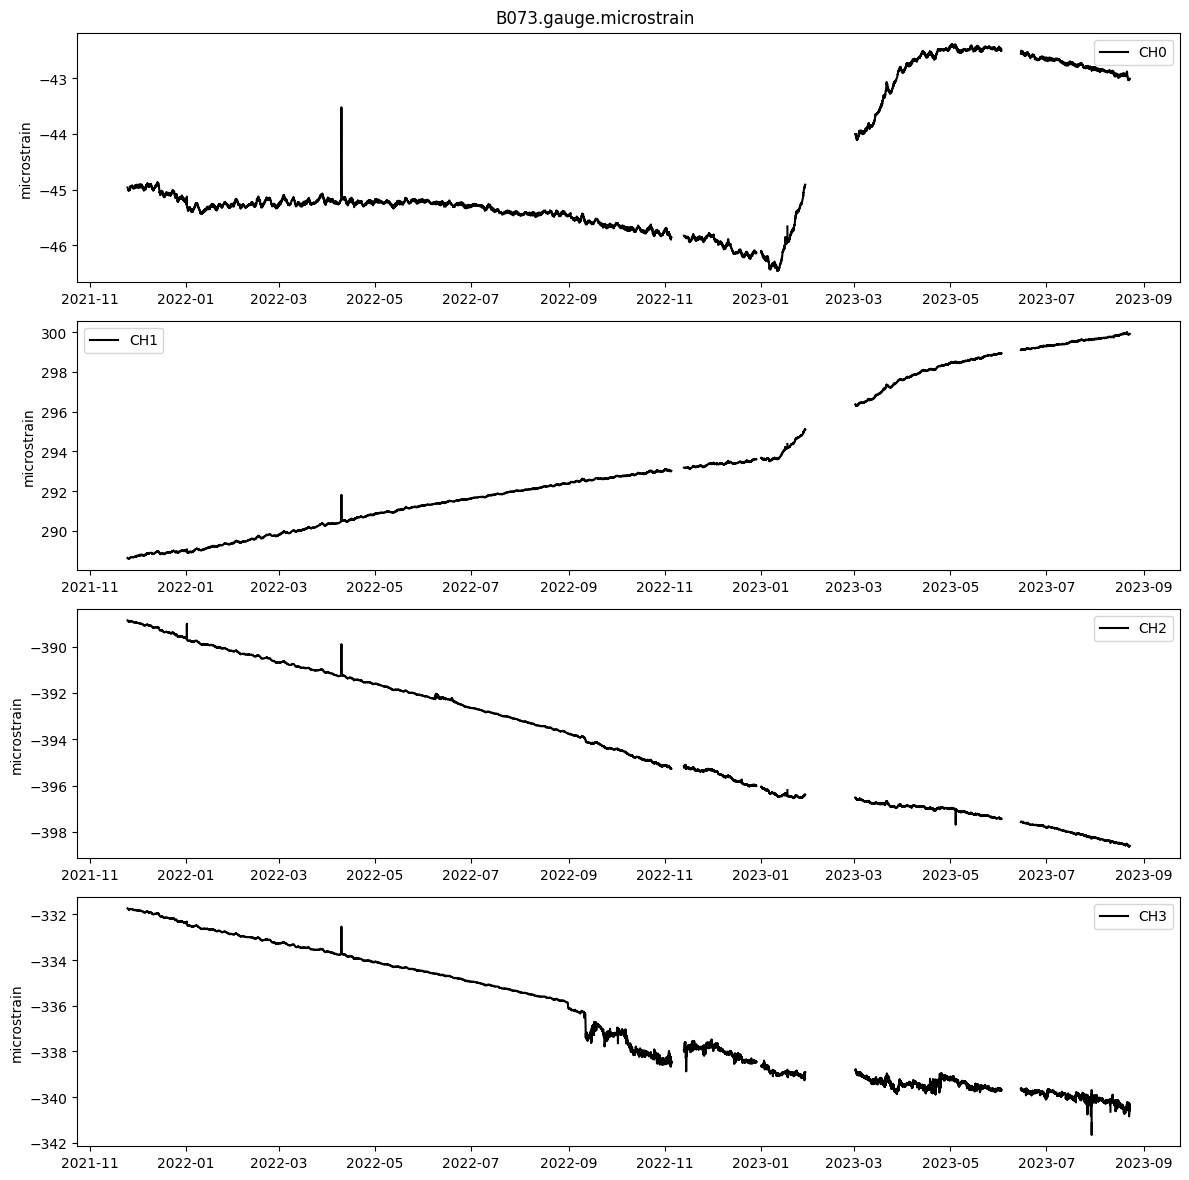

In [6]:
l2['microstrain'].plot()

### Apply corrections and view result

In [7]:
corrected = l2['microstrain'].apply_corrections([l2['atmp_c'], l2['trend_c'], l2['tide_c'],l2['offset_c']])


Applying corrections
    Found 18094 epochs with nans, 0.0 epochs with 999999s, and 865 missing epochs.
    Total missing data is 10.35%


In [8]:
corrected.stats()

B073.gauge.microstrain.corrected
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2021-11-25 00:00:00 - 2023-08-22 23:50:00        | Period:         300.0s
    | Series:   corrected| Units:   microstrain| Level:         2a| Gaps:           10.35% 
    | Epochs:      182302| Good:       163981.0| Missing:  17948.0| Interpolated:      0.0
    | Samples:     729208| Good:         655924| Missing:    71792| Interpolated:        0


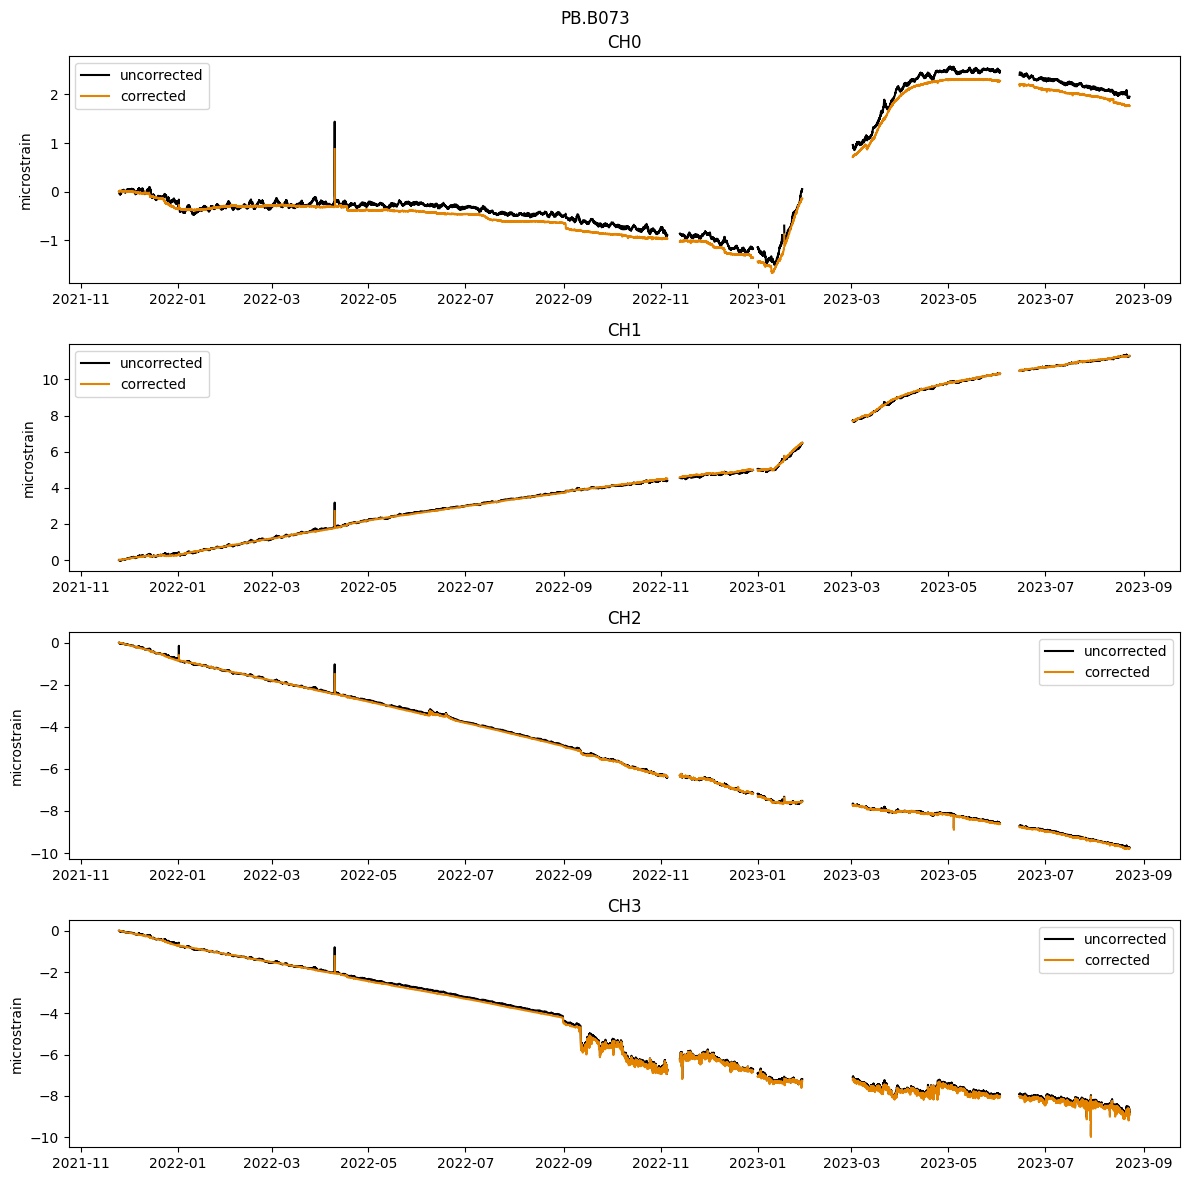

In [11]:
#view original vs corrected data
title = f"{network}.{station}"
plot_timeseries_comparison([l2['microstrain'],corrected], title=title, names=['uncorrected', 'corrected'], zero=True)